https://github.com/AmritK10/MNIST-CNN/tree/master
Need to find already low res MNIST digits https://github.com/zatserkl/mnist_resolution/tree/master
 or we need to do pooling (max pooling)


In [81]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [82]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [83]:
# Print dimensions of the original images
print("Original Train Images Shape:", train_images.shape)
print("Original Test Images Shape:", test_images.shape)

Original Train Images Shape: (60000, 28, 28)
Original Test Images Shape: (10000, 28, 28)


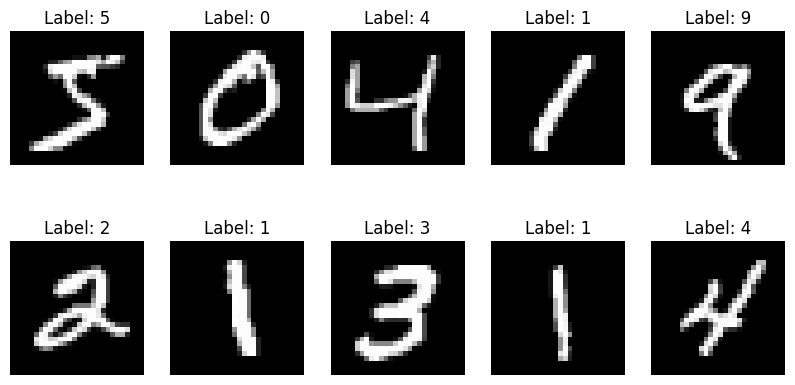

In [84]:
# Display some original images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [74]:
# Reshape images to 4D tensors (height, width, channels)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Define the pooling layer
pooling_layer = tf.keras.layers.MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='valid')

# Apply max pooling to the images
train_images_pooled = pooling_layer(train_images)
test_images_pooled = pooling_layer(test_images)

# Normalize pixel values to be between 0 and 1
train_images_pooled = train_images_pooled / 255.0
test_images_pooled = test_images_pooled / 255.0

print("Pooled Train Images Shape:", train_images_pooled.shape)

Pooled Train Images Shape: (60000, 7, 7, 1)


In [85]:
'''
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Define the pooling layer
pooling_layer = tf.keras.layers.AveragePooling2D(pool_size=(4, 4), strides=(4, 4), padding='valid')

# Apply pooling to the images
train_images_pooled = pooling_layer(train_images)
test_images_pooled = pooling_layer(test_images)

# Normalize pixel values to be between 0 and 1
train_images_pooled = train_images_pooled / 255.0
test_images_pooled = test_images_pooled / 255.0
print("Pooled Train Images Shape:", train_images_pooled.shape)
'''

Pooled Train Images Shape: (60000, 7, 7, 1)


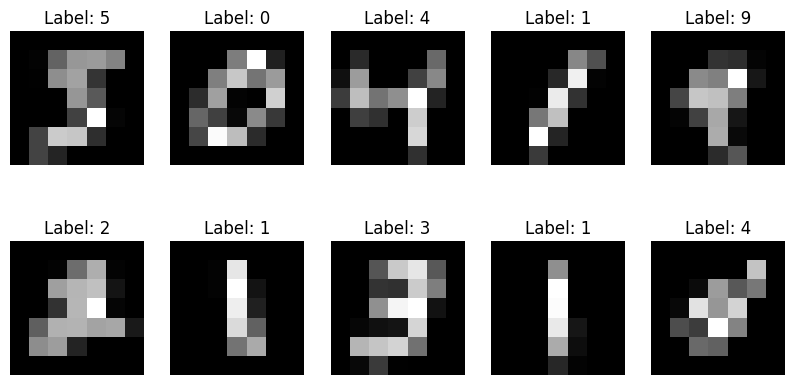

In [86]:
# Display some original images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images_pooled[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [87]:
# Reshape images to 3D tensors (height, width, channels)
train_images = train_images_pooled
test_images = test_images_pooled

In [88]:
# Define the CNN model with padding
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(7, 7, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [89]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)

Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8693 - loss: 0.4302 - val_accuracy: 0.9353 - val_loss: 0.2124
Epoch 2/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9385 - loss: 0.1949 - val_accuracy: 0.9558 - val_loss: 0.1448
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9491 - loss: 0.1606 - val_accuracy: 0.9604 - val_loss: 0.1299
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9553 - loss: 0.1400 - val_accuracy: 0.9614 - val_loss: 0.1244
Epoch 5/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9596 - loss: 0.1260 - val_accuracy: 0.9653 - val_loss: 0.1148
Epoch 6/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9631 - loss: 0.1161 - val_accuracy: 0.9632 - val_loss: 0.1201
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9646 - loss: 0.1074 - val_accuracy: 0.9603 - val_loss: 0.1237
Epoch 8/10
1875/1875 - 5s - 2ms/step - accuracy: 0.9674 - loss: 0.0986 - val_accuracy: 0.9657 - val_loss: 0.1087
Epoch 9/10
1875/1875 - 5s - 2ms/step - accuracy: 0.9687 - loss: 0.0960 - val_accuracy: 0.9633 - 

In [92]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test accuracy: {test_acc*100:.2f}%')

Test accuracy: 96.30%


In [97]:
# Mini-batch Bootstrap resampling for confidence interval estimation
n_iterations = 100
batch_size = 100  # Adjust batch size as needed
accuracy_results = []

for _ in range(n_iterations):
    # Randomly select indices for the mini-batch
    indices_tensor = tf.convert_to_tensor(indices)  # Convert numpy array to tensor
    resampled_images = tf.gather(train_images, indices_tensor)
    resampled_labels = tf.gather(train_labels, indices_tensor)
    
    # Train model on resampled mini-batch
    model.fit(resampled_images, resampled_labels, epochs=10, verbose=0)
    
    # Evaluate model on test data
    _, acc = model.evaluate(test_images, test_labels, verbose=0)
    accuracy_results.append(acc)  # Append accuracy value to the list

# Compute confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_confidence = max(0.0, np.percentile(accuracy_results, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper_confidence = min(1.0, np.percentile(accuracy_results, p))

print(f'95% Confidence interval for accuracy: [{lower_confidence}, {upper_confidence}]')


95% Confidence interval for accuracy: [0.9473999738693237, 0.9552574947476387]
